In [1]:
from keras import layers
from keras.models import Model
import numpy as np

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(x_train,_),(x_test,_)=mnist.load_data(path='mnist.npz')

In [4]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [5]:
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
encoding_dim=32
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(encoding_dim,activation='relu')(input_img)
decoded=layers.Dense(784,activation="sigmoid")(encoded)
autoencoder_Model=Model(input_img,decoded)

In [7]:
encoder_Model=Model(input_img,encoded)

In [8]:
encoded_input=layers.Input(shape=(encoding_dim,))
decoder_layer=autoencoder_Model.layers[-1]
decoder_Model=Model(encoded_input,decoder_layer(encoded_input))

In [9]:
autoencoder_Model.compile(optimizer='adam',loss='binary_crossentropy')

In [10]:
n_epochs=100
autoencoder_Model.fit(x_train,x_train,epochs=n_epochs,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.2760 - val_loss: 0.1929
Epoch 2/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1726 - val_loss: 0.1538
Epoch 3/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1442 - val_loss: 0.1333
Epoch 4/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1281 - val_loss: 0.1207
Epoch 5/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.1180 - val_loss: 0.1126
Epoch 6/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.1110 - val_loss: 0.1069
Epoch 7/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1059 - val_loss: 0.1025
Epoch 8/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1022 - val_loss: 0.0993
Epoch 9/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.0994 - val_loss: 0.0

60000/60000 [==============================] - 5s 78us/step - loss: 0.0924 - val_loss: 0.0915
Epoch 78/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.0924 - val_loss: 0.0913
Epoch 79/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.0924 - val_loss: 0.0913
Epoch 80/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.0924 - val_loss: 0.0913
Epoch 81/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.0924 - val_loss: 0.0913
Epoch 82/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.0924 - val_loss: 0.0913
Epoch 83/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.0924 - val_loss: 0.0913
Epoch 84/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0924 - val_loss: 0.0913
Epoch 85/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.0924 - val_loss: 0.0913
Epoch 86/100
60000/60000 [========================

In [11]:
encoded_imgs=encoder_Model.predict(x_test)
decoded_imgs=decoder_Model.predict(encoded_imgs)

In [12]:
import matplotlib.pyplot as plt

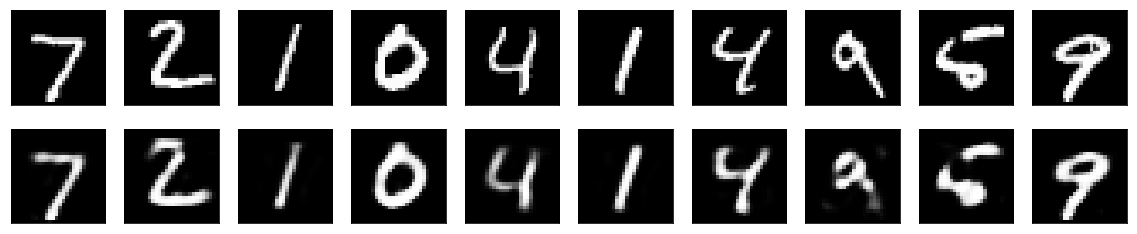

In [26]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
    